<a href="https://colab.research.google.com/github/Layana7592/Python/blob/main/LSTM_monthly_milk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/monthly_milk_production.csv',index_col='Date',parse_dates=True)
df

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


In [ ]:
df.tail()

,Production
Date,
1975-08-01,858
1975-09-01,817
1975-10-01,827
1975-11-01,797
1975-12-01,843


<Axes: xlabel='Date'>

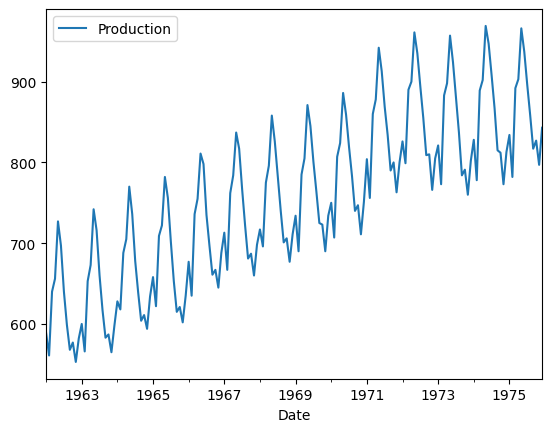

In [ ]:
df.plot()

In [ ]:
train=df.iloc[:156]  #70% 30%-->can't use traintest split
train

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1974-08-01,867
1974-09-01,815
1974-10-01,812


In [ ]:
test=df.iloc[156:]
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [ ]:
train.shape

(156, 1)

In [ ]:
test.shape

(12, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scalar.fit(train)
scaler_train=scalar.transform(train)
scaler_test=scalar.transform(test)


In [ ]:
#Timeseriesgenerator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_input=12
n_feature=1
generator=TimeseriesGenerator(scaler_train,scaler_train,length=n_input)
generator

In [ ]:
generator[0]

(array([[[0.08653846],
         [0.01923077],
         [0.20913462],
         ...,
         [0.05769231],
         [0.        ],
         [0.06971154]],
 
        [[0.01923077],
         [0.20913462],
         [0.24759615],
         ...,
         [0.        ],
         [0.06971154],
         [0.11298077]],
 
        [[0.20913462],
         [0.24759615],
         [0.41826923],
         ...,
         [0.06971154],
         [0.11298077],
         [0.03125   ]],
 
        ...,
 
        [[0.91826923],
         [0.81971154],
         [0.72596154],
         ...,
         [0.79326923],
         [0.82932692],
         [0.97115385]],
 
        [[0.81971154],
         [0.72596154],
         [0.61538462],
         ...,
         [0.82932692],
         [0.97115385],
         [0.89182692]],
 
        [[0.72596154],
         [0.61538462],
         [0.61778846],
         ...,
         [0.97115385],
         [0.89182692],
         [0.78846154]]]),
 array([[0.11298077],
        [0.03125   ],
        [0.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM


In [ ]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(12,1)))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
r=model.fit(generator,epochs=50)
r

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.3006
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2734 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2473
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2758
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1948
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2065
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1681
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1065
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0744
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0443
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0262
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0410
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0529
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0389
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0274
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms

In [ ]:
r.history

{'loss': [0.3088391125202179,
  0.2808624505996704,
  0.25390535593032837,
  0.2185056209564209,
  0.1997700333595276,
  0.16218703985214233,
  0.13098816573619843,
  0.10850110650062561,
  0.07535257935523987,
  0.04439514875411987,
  0.026157239452004433,
  0.042372483760118484,
  0.04705106467008591,
  0.03414269909262657,
  0.027318764477968216,
  0.02435377798974514,
  0.02668030560016632,
  0.028000779449939728,
  0.027489472180604935,
  0.026476217433810234,
  0.02489505521953106,
  0.023695550858974457,
  0.023591525852680206,
  0.023875389248132706,
  0.023593252524733543,
  0.023214351385831833,
  0.022673772647976875,
  0.02246718667447567,
  0.022268077358603477,
  0.02190464921295643,
  0.02168229967355728,
  0.02136167138814926,
  0.02118600904941559,
  0.020788710564374924,
  0.020353173837065697,
  0.01980770379304886,
  0.019514959305524826,
  0.01899847760796547,
  0.018294410780072212,
  0.017939068377017975,
  0.017305245622992516,
  0.016546601429581642,
  0.015738

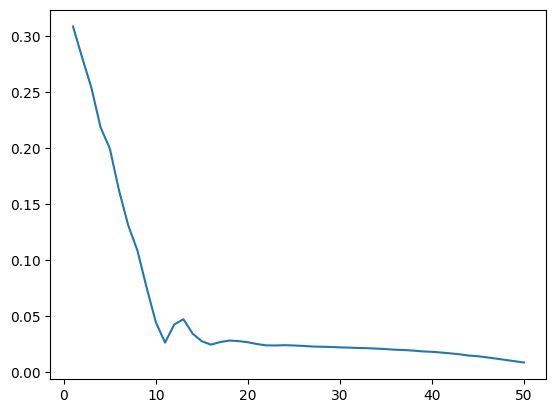

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,51),r.history['loss'])



In [ ]:
scaler_test

array([[0.67548077],
       [0.55048077],
       [0.81490385],
       [0.84134615],
       [0.99278846],
       [0.92307692],
       [0.82451923],
       [0.73317308],
       [0.63461538],
       [0.65865385],
       [0.58653846],
       [0.69711538]])

In [ ]:
last_train_batch=scaler_train[-12:]
last_train_batch

array([[0.66105769],
       [0.54086538],
       [0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ]])

In [ ]:
last_train_batch=last_train_batch.reshape(1,12,1)
y_pred1=model.predict(last_train_batch)
y_pred1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


array([[0.6697444]], dtype=float32)

In [ ]:
test_prediction=[]
first_eval_batch=scaler_train[-12:]
current_batch=first_eval_batch.reshape(1,12,1)
for i in range(len(scaler_test)):
  current_pred=model.predict(current_batch) [0]
  test_prediction.append(current_pred)
  print(test_prediction)

  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
  print(current_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[array([0.6697444], dtype=float32)]
[[[0.54086538]
  [0.80769231]
  [0.83894231]
  [1.        ]
  [0.94711538]
  [0.85336538]
  [0.75480769]
  [0.62980769]
  [0.62259615]
  [0.52884615]
  [0.625     ]
  [0.66974437]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[array([0.6697444], dtype=float32), array([0.75730336], dtype=float32)]
[[[0.80769231]
  [0.83894231]
  [1.        ]
  [0.94711538]
  [0.85336538]
  [0.75480769]
  [0.62980769]
  [0.62259615]
  [0.52884615]
  [0.625     ]
  [0.66974437]
  [0.75730336]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[array([0.6697444], dtype=float32), array([0.75730336], dtype=float32), array([0.9217333], dtype=float32)]
[[[0.83894231]
  [1.        ]
  [0.94711538]
  [0.85336538]
  [0.75480769]
  [0.62980769]
  [0.62259615]
  [0.52884615]
  [0.625     ]
  [0.66974437]
  [0.75730336]
  [0.92173332]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[array([0.6697444], dtype=float32), array([0.75730336], dtype=float32), array([0.921733

In [ ]:
print(test_prediction) #normalization o/p

[array([0.6697444], dtype=float32), array([0.75730336], dtype=float32), array([0.9217333], dtype=float32), array([1.038942], dtype=float32), array([1.0988731], dtype=float32), array([1.0185944], dtype=float32), array([0.8947805], dtype=float32), array([0.7801313], dtype=float32), array([0.6969598], dtype=float32), array([0.6539509], dtype=float32), array([0.6529388], dtype=float32), array([0.71910197], dtype=float32)]


In [ ]:
true_prediction=scalar.inverse_transform(test_prediction)
true_prediction

array([[ 831.61365891],
       [ 868.03819656],
       [ 936.44106102],
       [ 985.19986343],
       [1010.13122559],
       [ 976.73526382],
       [ 925.22869492],
       [ 877.53461266],
       [ 842.93527412],
       [ 825.04358673],
       [ 824.6225338 ],
       [ 852.14641762]])

In [ ]:
test['predicted_value']=true_prediction

<ipython-input-140-df143123632b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_value']=true_prediction


In [ ]:
test

,Production,predicted_value
Date,,
1975-01-01,834,831.613659
1975-02-01,782,868.038197
1975-03-01,892,936.441061
1975-04-01,903,985.199863
1975-05-01,966,1010.131226
1975-06-01,937,976.735264
1975-07-01,896,925.228695
1975-08-01,858,877.534613
1975-09-01,817,842.935274


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score
mape=mean_absolute_percentage_error(test['Production'],test['predicted_value'])
mape



0.03973622106799881

In [ ]:
r2=r2_score(test['Production'],test['predicted_value'])
r2

0.36306612108789516